In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
N=3000*10+1
tspan=np.linspace(0,(N-1)/10,N)
h0=140
vel0=1.837
h=np.zeros(N)
h[0]=h0
vel=np.zeros(N)
vel[0]=vel0

for i in range(N-1):
    h_res=150
    f=0.017
    l=2000+100
    d_p=0.585
    A_p=(np.pi*d_p**2)/4
    A_t=20
    vel[i+1]=np.sign(h_res-h[i])*(
        abs(h_res-h[i])*2*d_p*9.81/(f*l))**0.5
    h[i+1]=h[i]+A_p*vel[i]*0.1/A_t

def rwc(var,tspan):
    [h_rwc,vel_rwc]=var
    h_res=150
    f=0.017
    l=2000+100
    d_p=0.585
    A_p=(np.pi*d_p**2)/4
    A_t=20
    dh=A_p*vel_rwc/A_t
    dvel=(h_res-h_rwc-f*l/(2*9.81*d_p)*
          np.sign(vel_rwc)*vel_rwc**2)*9.81/l
    return [dh,dvel]
var0=[h0,vel0]
soln=odeint(rwc,var0,tspan)
h_rwc=soln[:,0]
v_rwc=soln[:,1]

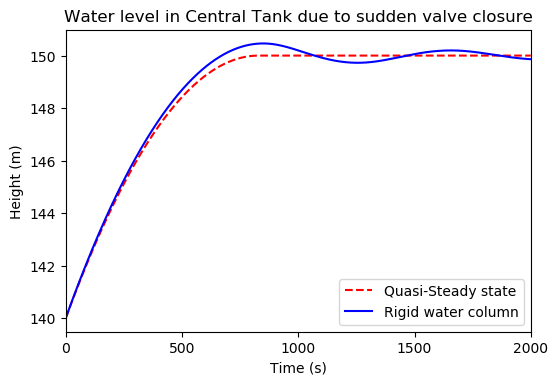

In [57]:
plt.plot(tspan,h,'r--', label='Quasi-Steady state')
plt.plot(tspan,h_rwc,'b-', label='Rigid water column')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend(loc='lower right')
plt.xlim([0,2000])
plt.xticks([0,500,1000,1500,2000])
plt.title('Water level in Central Tank due to sudden valve closure');

In [58]:
h_rwc.max(axis=0)

150.46246467030164